In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
data = pd.read_csv('tarantino.csv')
RESULT_PATH = 'analysis/'

# Check the number of rows and columns
data.shape

(1894, 4)

In [27]:
data.head(10)

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
5,Reservoir Dogs,word,fuck,0.66
6,Reservoir Dogs,word,shit,0.90
7,Reservoir Dogs,word,fuck,1.43
8,Reservoir Dogs,word,dicks,1.56
9,Reservoir Dogs,word,fuck,1.66


In [5]:
# Count the number of death and word

# Group by type column and print the count of each type
types = data.groupby('type')
print("NB death:", types.get_group('death').count()['type'], "- NB words:", types.get_group('word').count()['type'])

NB death: 190 - NB words: 1704


Number of different words: 60
Top 5 words:
fucking    407
shit       221
fuck       213
n-word     179
ass        140
Name: word, dtype: int64


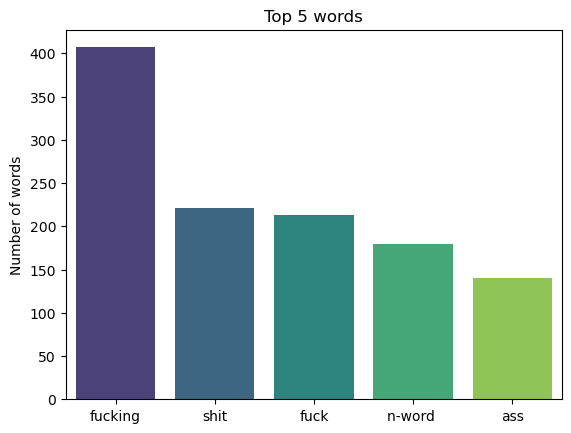

In [23]:
# Number of different words
print("Number of different words:", data['word'].nunique())

# Show top 5 words
print("Top 5 words:")
print(data['word'].value_counts().head())

colors = sns.color_palette('viridis', 5)
sns.barplot(x=data['word'].value_counts().head().index, y=data['word'].value_counts().head().values, palette=colors)
#set tilte and labels
plt.title('Top 5 words')
plt.ylabel("Number of words")
plt.savefig(RESULT_PATH + 'top5words.png', dpi=300, bbox_inches='tight')
plt.show()

Number of words per movie:
movie
Django Unchained       262
Inglorious Basterds     58
Jackie Brown           368
Kill Bill: Vol. 1       57
Kill Bill: Vol. 2       69
Pulp Fiction           469
Reservoir Dogs         421
Name: word, dtype: int64

Most used word for each movie:
Django Unchained : n-word  (114 times)
Inglorious Basterds : fuck (11 times)
Jackie Brown : shit (66 times)
Kill Bill: Vol. 1 : shit (8 times)
Kill Bill: Vol. 2 : fucking (19 times)
Pulp Fiction : fucking (133 times)
Reservoir Dogs : fucking (180 times)


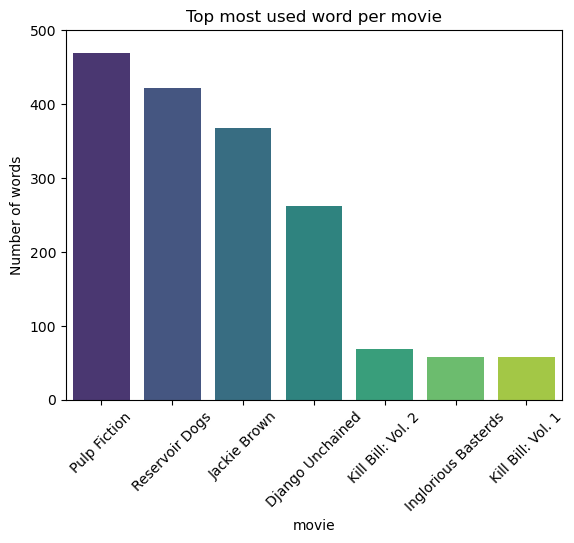

In [25]:
# Number of words per movie
print("Number of words per movie:")
print(data.groupby('movie').count()['word'])

# Top most used word per movie
print()
print("Most used word for each movie:")
movies = data.groupby('movie')
for movie in movies.groups:
    sorted_words = movies.get_group(movie)['word'].value_counts().head()
    print(movie, ":", sorted_words.index[0], "(" + str(sorted_words[0]) + " times)")
    
sorted_data = data.groupby('movie').count().sort_values('word', ascending=False)

sns.barplot(x=sorted_data.index, y=sorted_data['word'].values, palette="viridis")
plt.title("Top most used word per movie")
plt.ylabel("Number of words")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 600, 100))
plt.savefig(RESULT_PATH + 'top5movies.png', dpi=300, bbox_inches='tight')
plt.show()

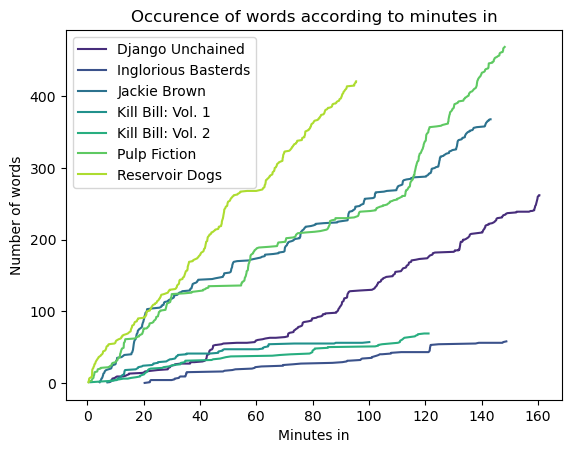

In [51]:
#For each movie, plot CDF of the number of words according to minutes_in
movies = data.groupby('movie')
palette = sns.color_palette('viridis', len(movies))

for i, movie in enumerate(movies.groups):
    words = movies.get_group(movie).groupby('minutes_in').count()['word']
    words = words.cumsum()
    plt.plot(words.index, words.values, label=movie, c=palette[i])
	
plt.title("Occurence of words according to minutes in")
plt.xlabel("Minutes in")
plt.ylabel("Number of words")

     

plt.legend()
plt.savefig(RESULT_PATH + 'words_per_minutes.png', dpi=300, bbox_inches='tight')
plt.show()
 


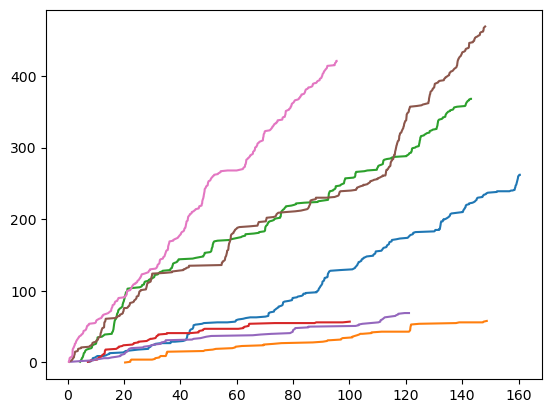

In [43]:
#plot ecdf of the number of words for each movies according to minutes_in
movies = data.groupby('movie')
for movie in movies.groups:
	words = movies.get_group(movie).groupby('minutes_in').count()['word']
	words = words.cumsum()
	plt.plot(words.index, words.values, label=movie)